In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score , silhouette_samples
import matplotlib.cm as cm
import seaborn as sns
sns.set(style= 'whitegrid')



In [3]:
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [8]:
df.head()
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# data preprocessing
#  Extract the relevant features for clustring to create clusters
x= df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [9]:
# determining the optimal numbers of cluster
# used ElBow Method
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++' , max_iter=300, n_init=10, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)


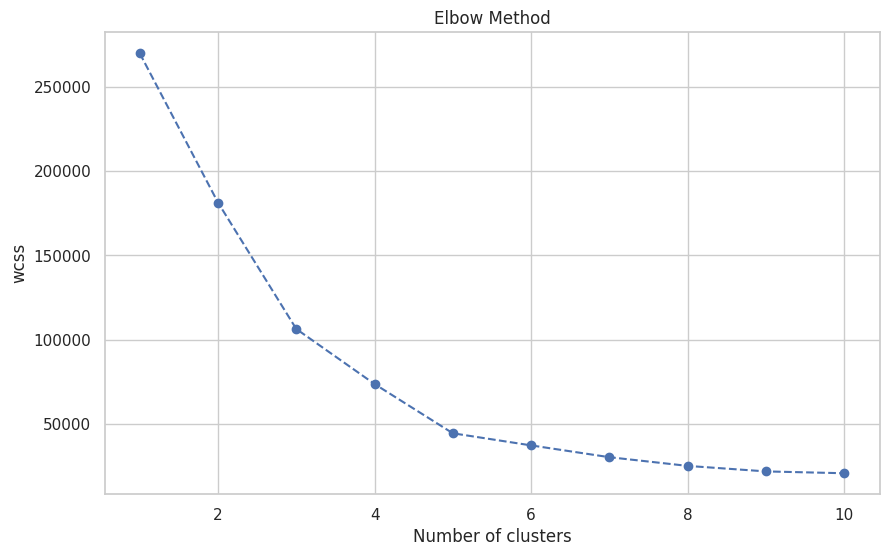

In [10]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [12]:
# Appllying K-Means Clustering algo
# Applying k-means to the dataset with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

In [13]:
df['Cluster'] = y_kmeans
df.head(30)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
5,6,Female,22,17,76,3
6,7,Female,35,18,6,4
7,8,Female,23,18,94,3
8,9,Male,64,19,3,4
9,10,Female,30,19,72,3


In [14]:
# average score
silhouette_avg = silhouette_score(x, y_kmeans)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.553931997444648


In [15]:
# compute each score fro each sample
sample_silhoutte = silhouette_samples(x, y_kmeans)

df['silhouette_score'] = sample_silhoutte
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,silhouette_score
0,1,Male,19,15,39,4,0.417005
1,2,Male,21,15,81,3,0.696378
2,3,Female,20,16,6,4,0.639953
3,4,Female,23,16,77,3,0.696483
4,5,Female,31,17,40,4,0.392300


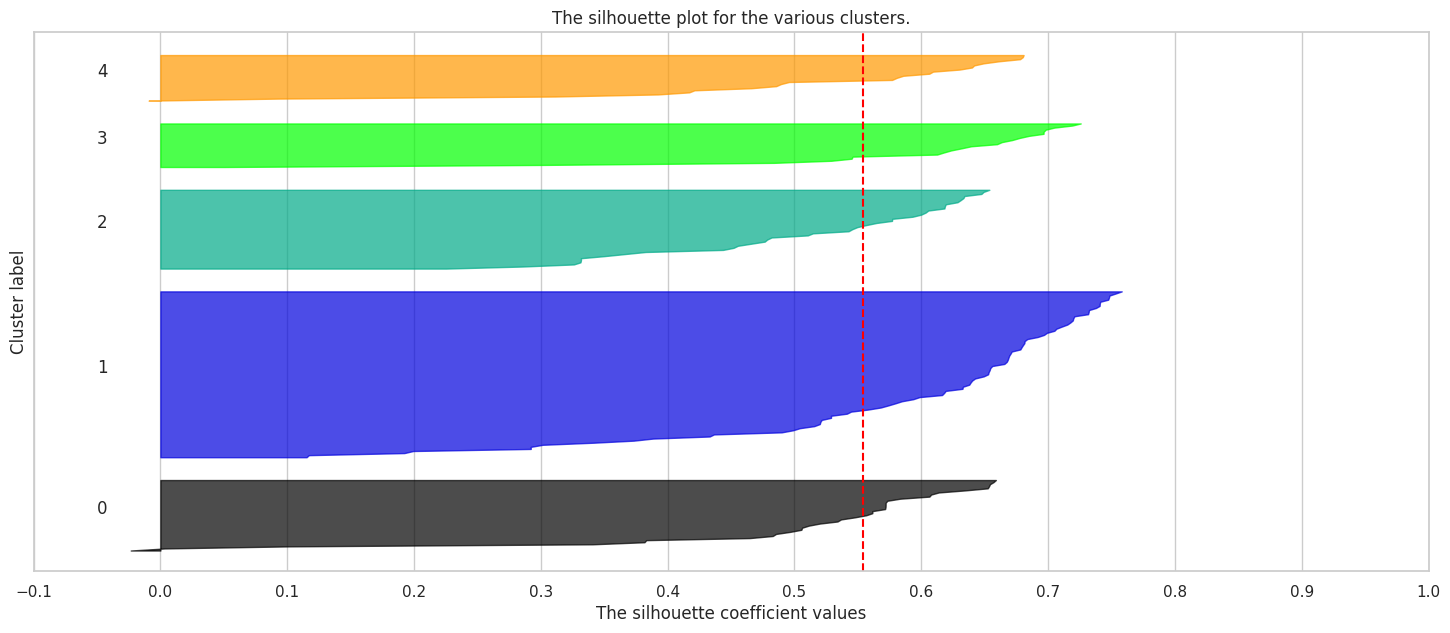

In [17]:
# visualize the silhouttes scores
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(18,7)

ax1.set_xlim([-0.1,1])
ax1.set_ylim([0,len(x) + (kmeans.n_clusters +1)*10])

y_lower = 10
for i in range(kmeans.n_clusters):
  ith_cluster_silhouette_values = sample_silhoutte[y_kmeans == i]
  ith_cluster_silhouette_values.sort()

  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i
  Color = cm.nipy_spectral(float(i)/kmeans.n_clusters)
  ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=Color, edgecolor=Color, alpha=0.7)

  ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
  y_lower = y_upper +10


ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg , color='red', linestyle='--')
ax1.set_yticks([])
ax1.set_xticks([i/10.0 for i in range(-1, 11)])

plt.show()



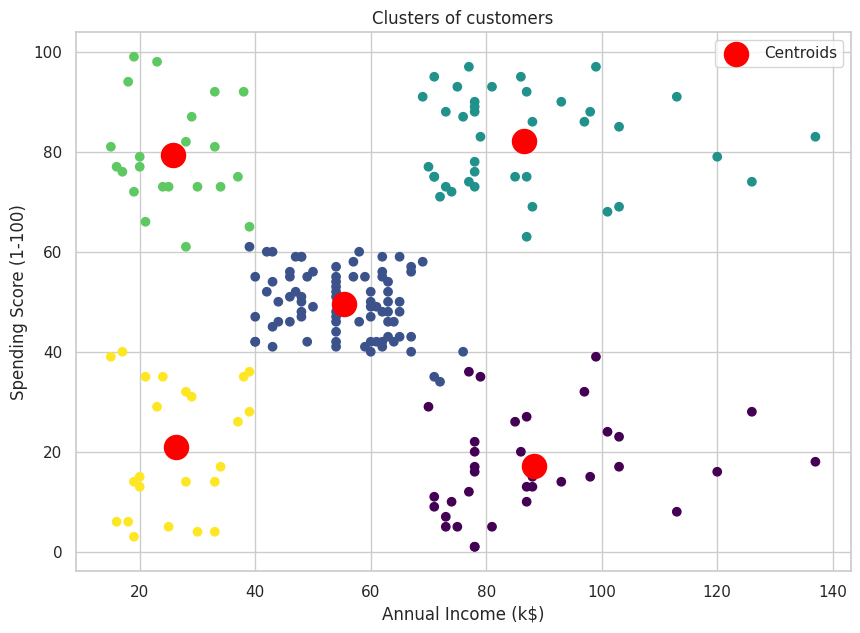

In [20]:

plt.figure(figsize=(10, 7))
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
